In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.constants as sc

In [12]:
p4p6_dG = pd.read_csv('../11_dG_scale_classification/reference/23_modrate_MRT_fit_with_error.csv')

# filter r2 > 0.8
p4p6_dG_filt = p4p6_dG[p4p6_dG['r2'] > 0.8]

# define regions as (start, end) inclusive
regions = {
    "MCR":   (103,121),
    "J5/5a": (122,127),
    "P5a":   (128,138),
    "TL":    (139,163),
    "P5c":   (164,179),
    "P5a":   (180,195),  # second block, same label
    "J5/5a": (196,199),  # second block, same label
    "MCR":   (200,218),  # second block, same label
    "TLR":   (220,253)
}

def assign_region(site):
    for region, (start, end) in regions.items():
        if start <= site <= end:
            return region
    return "Unassigned"

p4p6_dG_filt["region"] = p4p6_dG_filt["site"].apply(assign_region)

p4p6_dG_filt

/var/folders/k7/k3x4cyj90rz6_py6pr8yth9m0000gn/T/ipykernel_18470/488395633.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p4p6_dG_filt["region"] = p4p6_dG_filt["site"].apply(assign_region)


,construct,site,site_nt,buffer,kobs_val,kobs_err,kdeg_val,kdeg_err,fmod0,fmod0_err,...,max_kobs,max_kobs_err,KKp1,K,K_inv,K_relerr,dG,dG_err,dG_relerr,region
0,51,103,103G,13,0.000852,0.000201,0.00022,0.0,0.000506,1.527108e-04,...,0.000995,0.000223,0.856007,5.944800,0.168214,0.325621,-1.049030,0.191631,0.182675,Unassigned
1,51,104,104A,13,0.022662,0.001429,0.00022,0.0,0.001544,1.116225e-03,...,0.070662,0.003602,0.320715,0.472137,2.118030,0.081086,0.441669,0.047720,0.108045,Unassigned
2,51,105,105A,13,0.018211,0.001218,0.00022,0.0,0.000382,7.391216e-04,...,0.070662,0.003602,0.257722,0.347203,2.880157,0.084115,0.622553,0.049502,0.079515,Unassigned
3,51,106,106T,13,0.001129,0.000243,0.00022,0.0,0.001736,1.665553e-04,...,0.004031,0.000811,0.280016,0.388919,2.571226,0.294832,0.555779,0.173511,0.312195,Unassigned
4,51,107,107T,13,0.001207,0.000215,0.00022,0.0,0.000984,1.639606e-04,...,0.004031,0.000811,0.299421,0.427391,2.339777,0.268881,0.500267,0.158240,0.316310,Unassigned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,51,261,261A,14,0.004224,0.000442,0.00022,0.0,0.000292,2.776060e-15,...,0.070662,0.003602,0.059774,0.063574,15.729731,0.116485,1.621671,0.068552,0.042273,Unassigned
223,51,262,262A,14,0.008513,0.000591,0.00022,0.0,0.000583,5.673506e-04,...,0.070662,0.003602,0.120473,0.136975,7.300624,0.086116,1.169935,0.050680,0.043319,Unassigned
224,51,263,263C,14,0.001785,0.000451,0.00022,0.0,0.000977,2.556357e-15,...,0.056081,0.004091,0.031830,0.032877,30.416478,0.263146,2.009754,0.154864,0.077056,Unassigned
226,51,265,265A,14,0.001757,0.000172,0.00022,0.0,0.000590,2.447955e-05,...,0.070662,0.003602,0.024858,0.025492,39.228497,0.110281,2.159482,0.064901,0.030054,Unassigned


In [13]:
region_colors = {
    "MCR": "black",
    "J5/5a": "royalblue",
    "P5a": "goldenrod",
    "TL": "seagreen",
    "P5c": "purple",
    "TLR": "tomato"
}

df_0 = p4p6_dG_filt[p4p6_dG_filt['buffer'] == 13][['dG','region']]
df_5 = p4p6_dG_filt[p4p6_dG_filt['buffer'] == 14][['dG','region']]

df_0_sorted = df_0.sort_values(by='dG', ascending=False).reset_index(drop=True)
df_5_sorted = df_5.sort_values(by='dG', ascending=False).reset_index(drop=True)

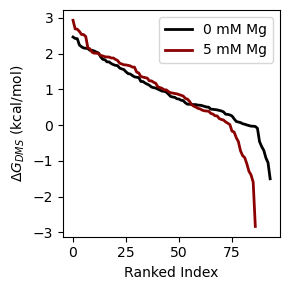

In [22]:
p4p6_0Mg = sorted(p4p6_dG_filt[p4p6_dG_filt['buffer'] == 13]['dG'].values, reverse=True)
p4p6_5Mg = sorted(p4p6_dG_filt[p4p6_dG_filt['buffer'] == 14]['dG'].values, reverse=True)

fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(p4p6_0Mg, color='black', linewidth=2, label='0 mM Mg')
ax.plot(p4p6_5Mg, color='darkred', linewidth=2, label='5 mM Mg')
ax.set_xlabel('Ranked Index')
ax.set_ylabel(r'$\Delta G_{DMS}$ (kcal/mol)')
ax.legend()
plt.tight_layout()
plt.savefig('p4p6_dG_ranked_overall.png', dpi=300)

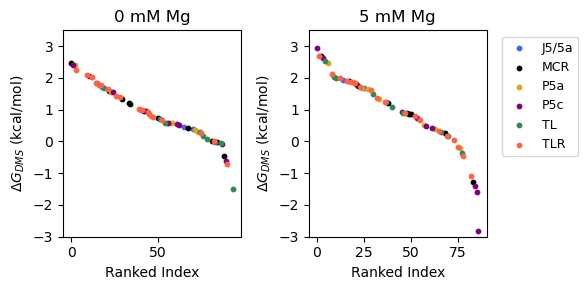

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(6,3))

# 0 mM Mg
for region, sub in df_0_sorted.groupby('region'):
    # skip unassigned regions
    if region == "Unassigned":
        continue
    axs[0].scatter(sub.index, sub['dG'], 
               s=10, 
               color=region_colors.get(region, "gray"), 
               label=f"{region}")

# 5 mM Mg
for region, sub in df_5_sorted.groupby('region'):
    # skip unassigned regions
    if region == "Unassigned":
        continue
    axs[1].scatter(sub.index, sub['dG'], 
               s=10, 
               color=region_colors.get(region, "gray"), 
               label=f"{region}")

axs[0].set_ylim(-3, 3.5)
axs[0].set_xlabel("Ranked Index")
axs[0].set_ylabel(r"$\Delta G_{DMS}$ (kcal/mol)")
axs[0].set_title("0 mM Mg")
axs[0].legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=7).remove()

axs[1].set_ylim(-3, 3.5)
axs[1].set_xlabel("Ranked Index")
axs[1].set_ylabel(r"$\Delta G_{DMS}$ (kcal/mol)")
axs[1].set_title("5 mM Mg")
axs[1].legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig('p4p6_dG_ranked_by_region.png', dpi=300)